In [25]:
import yfinance as yF
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
import os

In [26]:
stock_list = ['SDS', 'SPY', 'EUM', 'EFA', 'EEM', 'EFZ', 'DIA', 'DXD', 'QQQ', 'QID']
print('stock_list:', stock_list)

stock_list: ['SDS', 'SPY', 'EUM', 'EFA', 'EEM', 'EFZ', 'DIA', 'DXD', 'QQQ', 'QID']


In [27]:
data = yF.download(stock_list, start="2022-01-01", end="2022-06-18")

[*********************100%***********************]  10 of 10 completed


In [28]:
data.drop(['Adj Close','Volume','High','Open','Low'], axis=1, inplace=True)

In [29]:
data.columns = data.columns.map(''.join).str.strip('')

In [30]:
data.columns = data.columns.str.lstrip("Close")

In [110]:
data_new = data.pct_change()

In [112]:
data_new = data_new[1:]

In [113]:
data_new = (1 + data_new).cumprod() - 1

In [114]:
data_new = data_new * 100

In [125]:
data_new

,DIA,DXD,EEM,EFA,EFZ,EUM,QID,QQQ,SDS,SPY
Date,,,,,,,,,,
2022-01-04,0.598885,-1.253133,-0.345532,0.568250,-0.621824,0.237160,2.612669,-1.297050,0.143264,-0.033494
2022-01-05,-0.434805,1.002500,-1.971547,-0.315696,0.169580,1.976285,9.079035,-4.329313,3.868190,-1.953065
2022-01-06,-0.899688,1.879699,-1.524390,-0.820813,0.621813,1.343874,9.144341,-4.396536,4.154719,-2.045172
2022-01-07,-0.921569,1.879699,-0.630084,-0.530377,0.395702,0.316205,11.495749,-5.432187,4.871051,-2.432437
2022-01-10,-1.337230,2.882200,-0.630084,-1.452205,1.356697,0.553365,11.103852,-5.369948,4.871051,-2.553847
...,...,...,...,...,...,...,...,...,...,...
2022-06-13,-16.435137,34.060149,-19.329272,-21.012758,20.463532,18.577079,80.404965,-31.435469,48.710600,-21.500491
2022-06-14,-16.785169,35.288214,-18.211380,-21.757801,21.876760,16.679847,79.621158,-31.310992,49.484229,-21.737037
2022-06-15,-15.983916,32.631569,-17.134147,-20.292970,19.276426,15.335973,70.803389,-29.595700,45.214894,-20.621293


In [120]:
#Plot

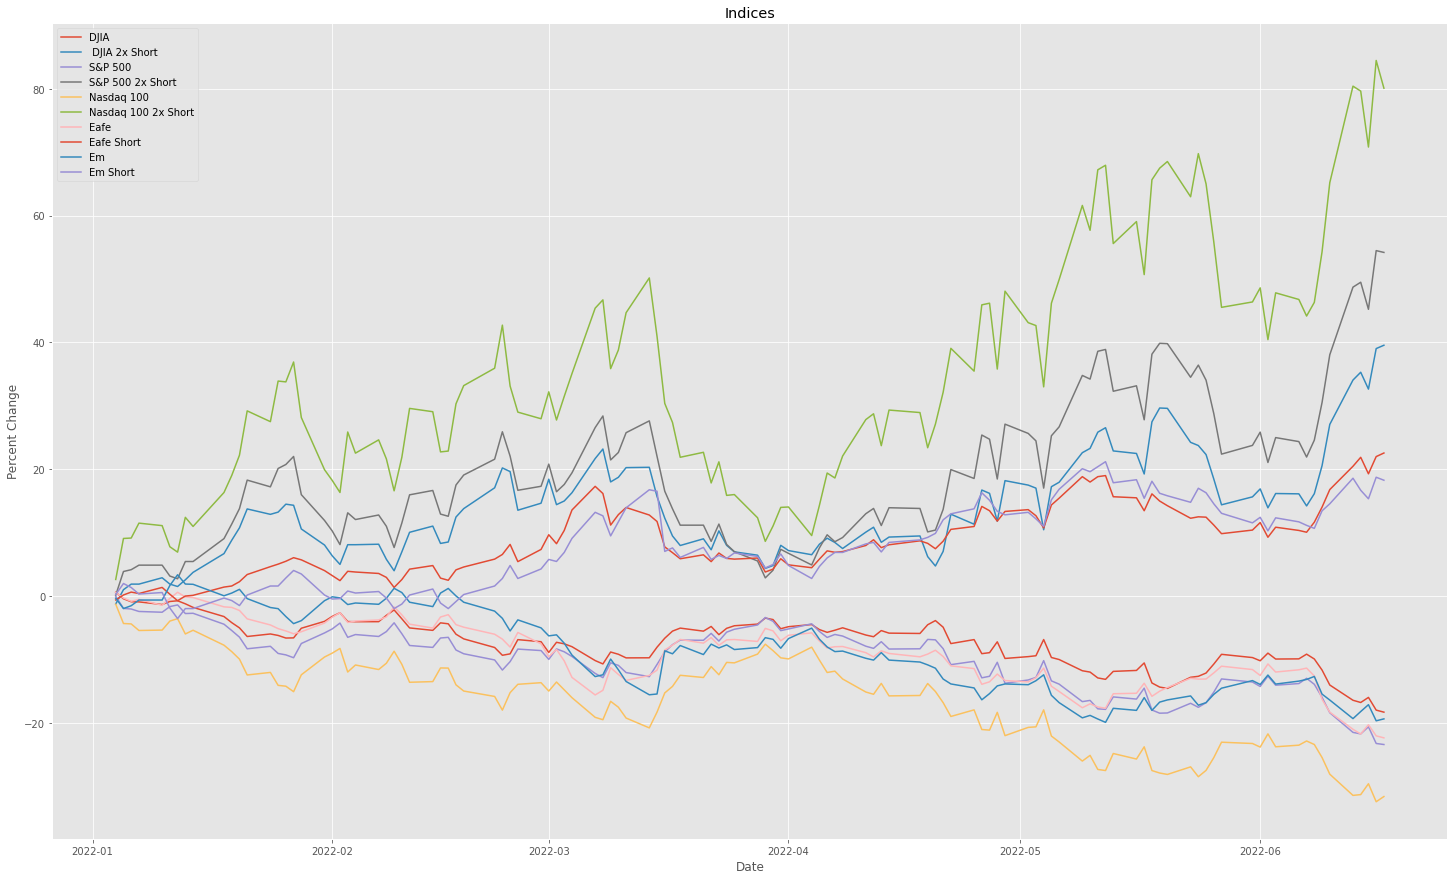

In [149]:
plt.plot(data_new['DIA'], label = "DJIA")
plt.plot(data_new['DXD'], label = " DJIA 2x Short")
plt.plot(data_new['SPY'], label = "S&P 500")
plt.plot(data_new['SDS'], label = "S&P 500 2x Short")
plt.plot(data_new['QQQ'], label = "Nasdaq 100")
plt.plot(data_new['QID'], label = "Nasdaq 100 2x Short")
plt.plot(data_new['EFA'], label = "Eafe")
plt.plot(data_new['EFZ'], label = "Eafe Short")
plt.plot(data_new['EEM'], label = "Em")
plt.plot(data_new['EUM'], label = "Em Short")
plt.title("Indices")
plt.xlabel("Date")
plt.ylabel("Percent Change")
plt.legend()
plt.savefig('Hedged_Equity_Fund.jpg')

In [150]:
print(data_new.tail(1))

                 DIA        DXD        EEM        EFA        EFZ        EUM  \
Date                                                                          
2022-06-17 -18.31109  39.548868 -19.369924 -22.363938  22.555114  18.260873   

                  QID        QQQ        SDS        SPY  
Date                                                    
2022-06-17  80.078373 -31.614716  54.183378 -23.413788  
